<a href="https://colab.research.google.com/github/SundasAshraf/Car-price-prediction-model/blob/main/model_development_laptops_jupyterlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


### Importing the dataset
Run the cell below to download the dataset into this environment.

This function will download the dataset into your browser


We put the file path along with a quotation mark so that pandas will read the file into a dataframe from that address. The file path can be either an URL or your local file address.


You will need to download the dataset using the download() function:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_name='/content/drive/MyDrive/Colab Notebooks/data/laptop_pricing_dataset_base.csv'
headers=['Manufacturer', 'Category','GPU', 'OS', 'CPU_core', 'Screen_Size_cm',  'CPU_frequency', 'RAM_GB',
        'Storage_GB_SSD', 'Weight_kg', 'Price']

df = pd.read_csv(file_name, names=headers)

In [ ]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe")
df.head(5)



In [ ]:
df.describe()

,Manufacturer,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,2.360084,7.882353,245.781513,1462.344538
std,0.776533,0.638282,0.235790,1.241787,0.411393,2.482603,34.765316,574.607699
min,1.000000,1.000000,1.000000,3.000000,1.200000,4.000000,128.000000,527.000000
25%,3.000000,2.000000,1.000000,5.000000,2.000000,8.000000,256.000000,1066.500000
50%,3.000000,2.000000,1.000000,5.000000,2.500000,8.000000,256.000000,1333.000000
75%,4.000000,3.000000,1.000000,7.000000,2.700000,8.000000,256.000000,1777.000000
max,5.000000,3.000000,2.000000,7.000000,2.900000,16.000000,256.000000,3810.000000


In [ ]:
df.shape

(238, 11)

# Task 1 : Single Linear Regression

You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.


In [16]:
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)


<details>
    <summary>Click here for Solution</summary>

```python
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)
```

</details>


Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?


<ipython-input-18-086cb2fc0af4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
<ipython-input-18-086cb2fc0af4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" ,

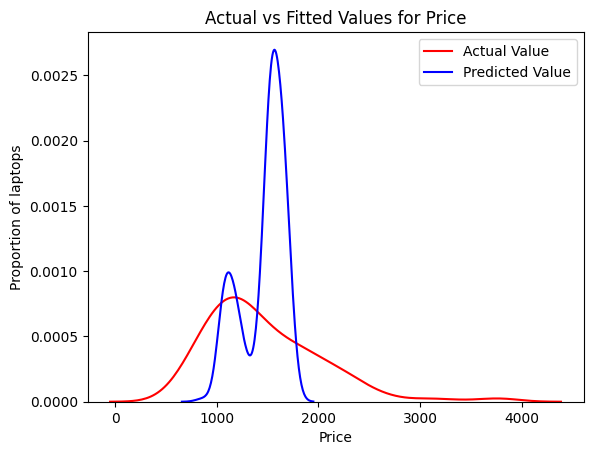

In [18]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()


Evaluate the Mean Squared Error and R^2 score values for the model.


In [19]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)


The R-square for Linear Regression is:  0.13444363210243282
The mean square error of price and predicted value is:  284583.4405868628


# Task 2 - Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.


In [23]:
# Write your code below and press Shift+Enter to execute
lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)

ValueError: could not convert string to float: 'IPS Panel'

<details>
    <summary>Click here for Solution</summary>

```python
lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)
```

</details>


Plot the Distribution graph of the predicted values as well as the Actual values


In [ ]:
# Write your code below and press Shift+Enter to execute


<details>
    <summary>Click here for Solution</summary>

```python
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

```

</details>


Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?


In [ ]:
# Write your code below and press Shift+Enter to execute


<details>
    <summary>Click here for Solution</summary>

```python
ax2 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
```

</details>


# Task 3 - Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`.


In [ ]:
#  Write your code below and press Shift+Enter to execute
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)


<details>
    <summary>Click here for Solution</summary>

```python
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)
```

</details>


Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.


In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

Call this function for the 3 models created and get the required graphs.


In [ ]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 1
PlotPolly(p1, X, Y, 'CPU_frequency')

<details>
    <summary>Click here for Solution</summary>
    
```python
PlotPolly(p1, X, Y, 'CPU_frequency')
```

</details>


In [ ]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 3
PlotPolly(p3, X, Y, 'CPU_frequency')

<details>
    <summary>Click here for Solution</summary>
    
```python
PlotPolly(p3, X, Y, 'CPU_frequency')
```

</details>


In [22]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 5
PlotPolly(p5, X, Y, 'CPU_frequency')

NameError: name 'PlotPolly' is not defined

<details>
    <summary>Click here for Solution</summary>
    
```python
PlotPolly(p5, X, Y, 'CPU_frequency')
```

</details>


Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.


In [21]:
#  Write your code below and press Shift+Enter to execute
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

NameError: name 'p1' is not defined

<details>
    <summary>Click here for Solution</summary>
    
```python
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))
```

</details>


# Task 4 - Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline.


In [ ]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)


Evaluate the MSE and R^2 values for the this predicted output.


In [ ]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)
